<a href="https://colab.research.google.com/github/PrasannaMadiwar/DataWars-Cleaned-Analysis/blob/main/Power_Transformer_to_Normal_Distribution(Box_Cox_%26_Yeo_Jonhson).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
import pandas as pd
import numpy as np

In [17]:
df = pd.read_csv('/content/titanic.csv')

In [18]:
df.drop('Name',axis=1,inplace=True)

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
x = df.drop('Survived',axis=1)
y = df['Survived']

In [21]:
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stast

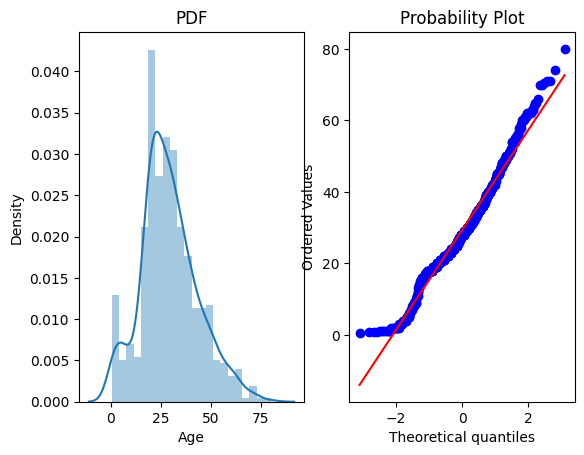

In [23]:
plt.subplot(121)
sns.distplot(X_train['Age'])
plt.title('PDF')
plt.subplot(122)
stast.probplot(X_train['Age'],dist='norm',plot=plt)
plt.show()

In [65]:
from sklearn.preprocessing import PowerTransformer

In [82]:
pt = PowerTransformer()
pt.fit(X_train[['Age']])


PowerTransformer()

In [83]:

X_train_ = pt.transform(X_train[['Age']])
X_test_ = pt.transform(X_test[['Age']])

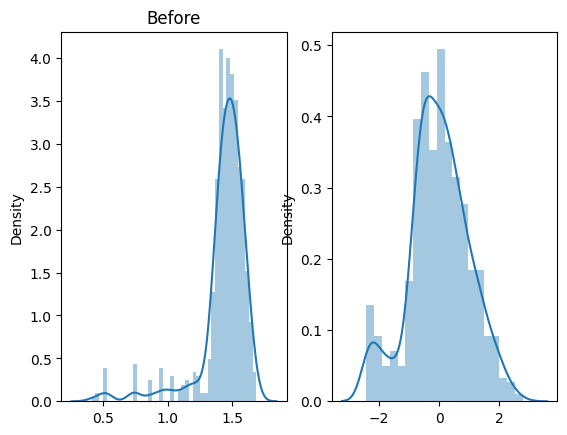

In [84]:
plt.subplot(121)
sns.distplot(X_train[['Age']])
plt.title("Before")
plt.subplot(122)
sns.distplot(X_train_)
plt.show()

In [86]:
pt = PowerTransformer(method='box-cox')
pt.fit(X_train[['Age']])


PowerTransformer(method='box-cox')

In [87]:
X_train_1 = pt.transform(X_train[['Age']])
X_test_1 = pt.transform(X_test[['Age']])

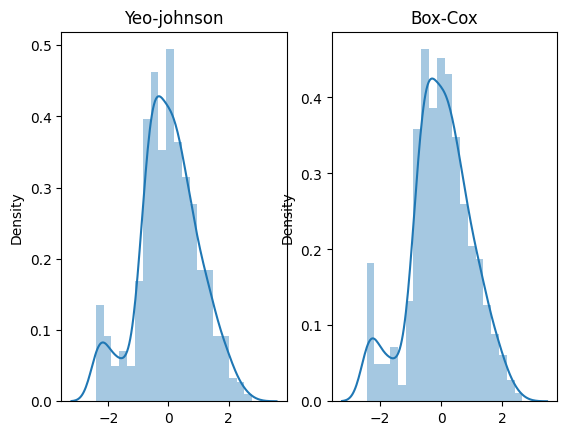

In [90]:
plt.subplot(121)
sns.distplot(X_train_)
plt.title("Yeo-johnson")
plt.subplot(122)
sns.distplot(X_train_1)
plt.title('Box-Cox')
plt.show()